In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 10].reset_index(drop=True)

data['block_label'] += 1

data.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0
1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0
2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0
3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0
4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0


#### Initialise the model

In [3]:
model = rlssm.RLDDModel(hierarchical_levels=1, threshold_modulation=True)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLDDM', 'RLDDM_thrmod', 1)

### Fit

In [5]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 27.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = None
threshold_priors = None
ndt_priors = None

In [6]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    alpha_priors=alpha_priors,
    drift_scaling_priors=drift_scaling_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
1.0 of 200 iterations ended with a divergence (0.5%)
  Try running with larger adapt_delta to remove the divergences
2 of 200 iterations saturated the maximum tree depth of 10 (1.0%)
Run again with max_depth set to a larger value to avoid saturation
E-BFMI indicated no pathological behavior


#### get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,5.000000
mean,1.028381
std,0.036323
min,1.004573
25%,1.006443
50%,1.018795
75%,1.019944
max,1.092149


In [8]:
model_fit.rhat.head()

,rhat,variable
0,1.092149,alpha
1,1.004573,drift_scaling
2,1.018795,threshold
3,1.019944,threshold_modulation
4,1.006443,ndt


#### get wAIC

In [9]:
model_fit.waic

{'lppd': -222.16681174391903,
 'p_waic': 6.836184768666476,
 'waic': 458.005993025171,
 'waic_se': 28.91574780393356}

### Posteriors

In [10]:
model_fit.samples

,chain,draw,transf_alpha,transf_drift_scaling,transf_threshold,transf_threshold_modulation,transf_ndt
0,0,90,0.007835,0.580896,1.473735,0.016771,0.794182
1,0,82,0.009181,0.462339,0.980164,0.036782,0.783744
2,0,87,0.341199,0.081939,2.877762,-0.027583,0.801994
3,0,73,0.007933,0.611815,0.852093,0.041012,0.804864
4,0,2,0.000665,5.448041,0.043890,0.167328,0.816205
...,...,...,...,...,...,...,...
195,1,30,0.008509,0.561498,1.341972,0.017961,0.796638
196,1,88,0.007199,0.518468,1.527085,0.012908,0.799229
197,1,41,0.017708,0.267655,1.166507,0.026071,0.789138
198,1,56,0.018588,0.279397,1.253827,0.021377,0.792802


In [11]:
model_fit.trial_samples

OrderedDict([('drift_t',
              array([[0.        , 0.15246788, 0.16037587, ..., 2.21165858, 0.59962438,
                      0.59947765],
                     [0.        , 0.14219334, 0.14937706, ..., 2.00515284, 0.54727393,
                      0.54649418],
                     [0.        , 0.9365715 , 0.67292939, ..., 1.42915361, 0.47890742,
                      0.34346227],
                     ...,
                     [0.        , 0.1587738 , 0.16544134, ..., 1.89638161, 0.53550021,
                      0.53075733],
                     [0.        , 0.17398234, 0.18113531, ..., 2.04484171, 0.57911523,
                      0.57354397],
                     [0.        , 0.1433067 , 0.15183721, ..., 2.47877035, 0.63976407,
                      0.64392976]])),
             ('threshold_t',
              array([[1.8465024 , 1.84835636, 1.85116552, ..., 2.0055131 , 1.97165524,
                      1.97202144],
                     [1.71883189, 1.7234764 , 1.73051342, ..., 

In [12]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

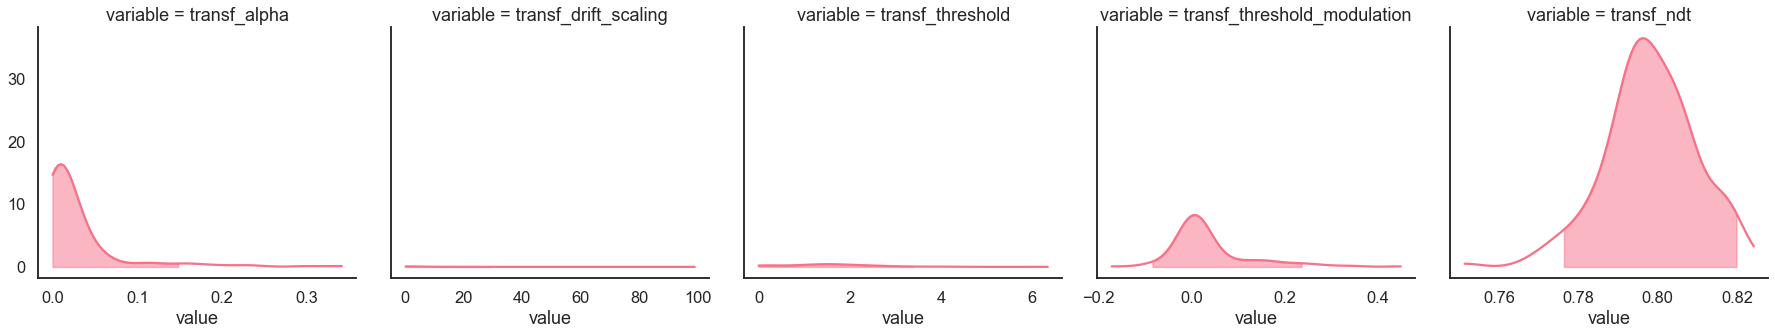

In [13]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

#### Ungrouped

In [14]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.247182  1.526182  1.020182  2.642182  1.592182  1.605182   
2         2.147744  2.632744  1.300744  1.434744  0.869744  3.048744   
3         4.673994  1.256994  1.634994  1.386994  2.032994  2.066994   
4         1.074864  1.449864  1.371864  1.206864  1.613864  1.861864   
5         1.059205  1.531205  2.104205  0.978205  1.227205  1.461205   
...            ...       ...       ...       ...       ...       ...   
96        2.790066  1.787066  6.281066  1.464066  1.567066  2.067066   
97        1.199413  1.171413  5.427413  2.730413  2.519413  1.103413   
98        1.658040  1.191040  4.471040  1.220040  1.757040  1.527040   
99        3.160875  1.151875  2.095875  1.736875  4.063875  0.926875   
100       2.578722  1.848722  2.088722  1.986722  3.018722  1.566722   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         2.787182  2.223182  1.866182  2.880182  ...      1.0  0.0  1.0  1.0   
2         1.503744  2.039744  1.173744  1.269744  ...      1.0  1.0  1.0  1.0   
3         3.060994  3.167994  1.129994  1.384994  ...      1.0  1.0  1.0  0.0   
4         1.190864  1.097864  1.253864  1.058864  ...      1.0  1.0  1.0  1.0   
5         1.057205  1.249205  1.340205  1.571205  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.920066  1.722066  1.322066  2.176066  ...      1.0  1.0  1.0  1.0   
97        0.973413  0.971413  2.536413  1.480413  ...      1.0  1.0  1.0  1.0   
98        2.229040  1.184040  0.969040  6.008040  ...      1.0  1.0  1.0  1.0   
99        1.552875  1.330875  1.498875  1.248875  ...      1.0  1.0  1.0  1.0   
100       1.071722  1.200722  1.438722  1.702722  ...      1.0  1.0  1.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  0.0  1.0  1.0  1.0  1.0  
2         1.0  0.0  0.0  1.0  1.0  1.0  
3         1.0  1.0  0.0  1.0  1.0  0.0  
4         1.0  1.0  1.0  1.0  0.0  1.0  
5         1.0  0.0  1.0  1.0  0.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  0.0  
98        1.0  1.0  1.0  1.0  0.0  1.0  
99        1.0  0.0  1.0  1.0  1.0  1.0  
100       1.0  0.0  1.0  1.0  1.0  1.0  

[100 rows x 478 columns]

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.774059,1.633617,2.922988,1.077982,1.312582,1.570182,1.932782,2.882182,0.987582,1.170582,1.340182,1.694782,2.497982
2,0.740586,1.722639,2.472975,1.050144,1.244244,1.420744,1.753944,2.421444,1.026344,1.192344,1.459744,1.821344,2.706544
3,0.736402,1.531508,2.866300,1.023194,1.215394,1.484994,1.817594,2.602594,0.982494,1.140494,1.288494,1.576994,2.182994
4,0.815900,1.453069,1.930509,1.050864,1.170364,1.283864,1.588464,1.887564,0.988464,1.119064,1.288864,1.578464,2.142464
5,0.723849,1.523406,1.671841,1.078205,1.205205,1.362705,1.646205,1.966705,1.038805,1.200405,1.372205,1.656205,2.159605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.811715,1.526940,1.756470,1.023266,1.213866,1.354066,1.780666,2.268066,1.010366,1.168866,1.409066,1.580166,2.096366
97,0.736402,1.519329,2.116428,1.056213,1.157613,1.335413,1.625613,2.112213,1.014913,1.138913,1.307413,1.571413,2.318913
98,0.728033,1.495031,1.459277,1.042640,1.194040,1.341040,1.707840,2.462640,0.996740,1.191540,1.342040,1.616140,2.114140


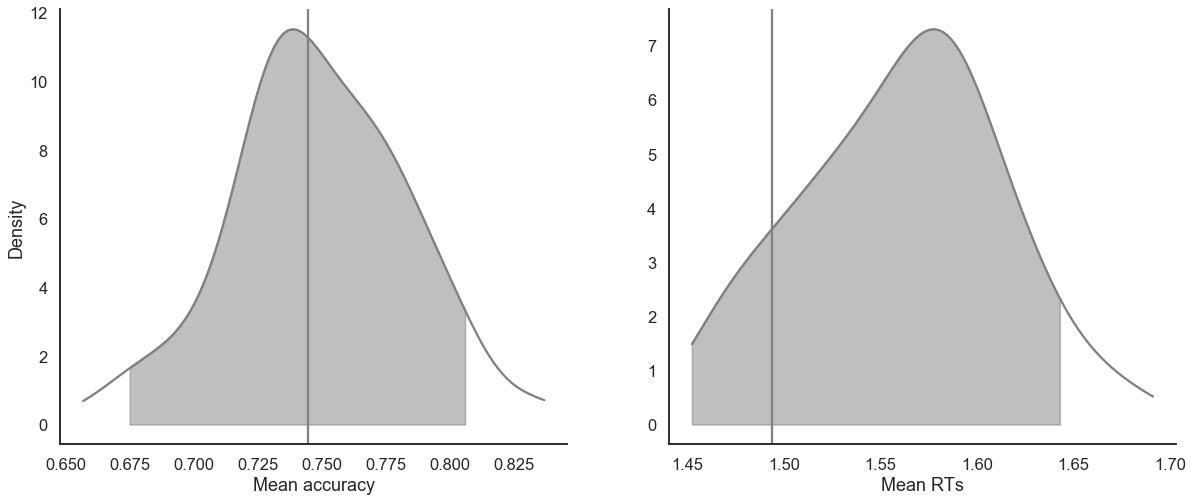

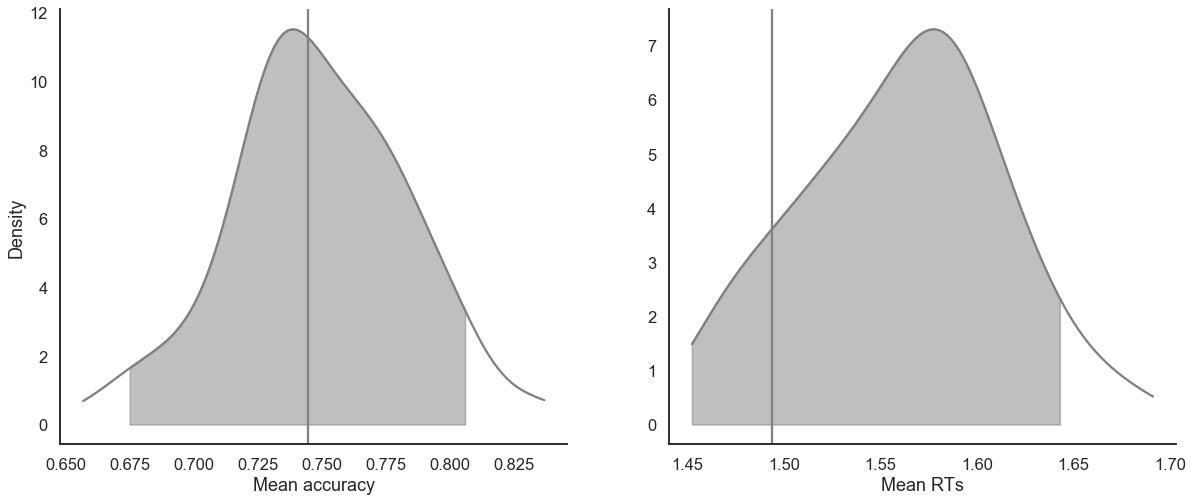

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

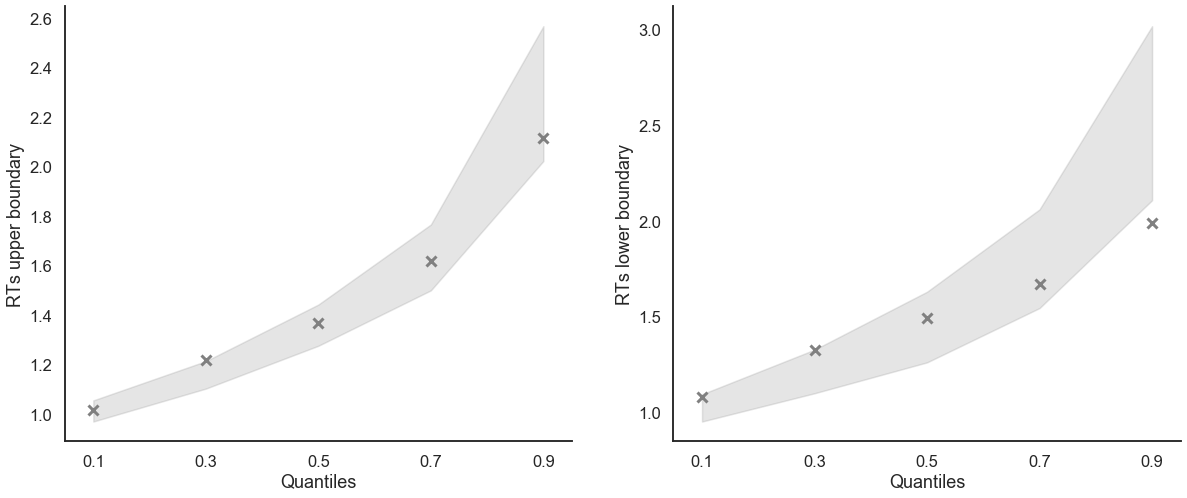

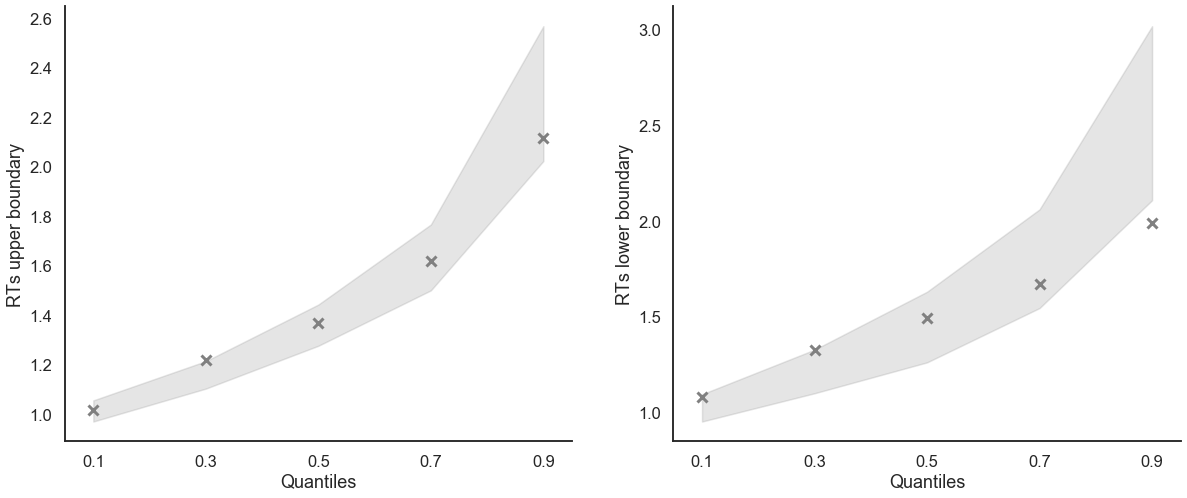

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

#### Grouped

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,choice_pair,block_bins
0,0,10,1.0,1.0,61.0,52.0,4,3,1.0,1.285418,0.0,-1,CD,1
1,1,10,1.0,2.0,54.0,37.0,4,2,1.5,1.577622,0.0,-1,BD,1
2,2,10,1.0,3.0,51.0,51.0,4,3,2.5,1.564731,0.0,-1,CD,1
3,3,10,1.0,4.0,50.0,35.0,3,1,2.0,1.217245,1.0,1,AC,1
4,4,10,1.0,5.0,59.0,50.0,4,2,3.0,1.929781,0.0,-1,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1                0.85  1.548932  1.590068   
                        2                0.50  1.345844  1.528482   
                        3                0.60  1.728194  0.610079   
                        4                0.75  1.435564  2.433296   
                        5                0.60  1.383055  1.333356   
...                                       ...       ...       ...   
3.0         CD          96               0.50  1.486666  1.613342   
                        97               0.60  1.491613  1.463802   
                        98               0.55  1.651990  1.263724   
                        99               0.65  1.623675  1.240336   
                        100              0.70  1.520122  1.162632   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.445782        1.165182   
                        2              1.071844        1.210344   
                        3              1.396494        1.655394   
                        4              1.194864        1.065664   
                        5              1.066805        1.068405   
...                                         ...             ...   
3.0         CD          96             1.050566        1.276166   
                        97             1.116613        1.175913   
                        98             1.198840        1.416040   
                        99             1.435875        1.022875   
                        100            1.213722        1.164322   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.520182        1.366182   
                        2              1.310744        1.290744   
                        3              1.490994        1.776994   
                        4              1.206864        1.321864   
                        5              1.374705        1.179205   
...                                         ...             ...   
3.0         CD          96             1.130566        1.393066   
                        97             1.268913        1.283413   
                        98             1.244040        1.452040   
                        99             1.537875        1.258875   
                        100            1.403222        1.401722   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1.0         AB          1              1.676182        1.748382  
                        2              1.533944        1.365244  
                        3              1.751094        1.858094  
                        4              1.358864        1.540464  
                        5              1.621405        1.280905  
...                                         ...             ...  
3.0         CD          96             1.212066        1.723566  
                        97             1.398713        1.850313  
                        98             1.535840        2.077040  
                        99             2.139075        1.703875  
                        100            1.733722        1.501122  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.600000  1.508515  2.117252         1.313682   
           2            0.400000  1.901544  1.348471         1.166744   
           3            0.566667  1.405494  1.333816         1.074794   
           4            0.633333  1.743631  1.569563         1.199864   
           5            0.866667  1.604572  0.948129         1.627305   
...                          ...       ...       ...              ...   
8          96           0.965517  1.418755  1.902007         1.172066   
           97           0.931034  1.475309  2.172983         1.478113   
           98           0.896552  1.366902  1.859199         1.033240   
           99           0.931034  1.289737  1.540991         1.981175   
           100          0.862069  1.397239  1.346749         1.136022   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.241282         1.442182        1.350682   
           2             1.484144         1.597744        1.756244   
           3             1.212194         1.169994        1.316994   
           4             1.351664         1.525864        1.499864   
           5             1.141205         1.664205        1.427205   
...                           ...              ...             ...   
8          96            1.059766         1.172066        1.158066   
           97            1.043213         1.719913        1.199413   
           98            1.062540         1.108040        1.187540   
           99            1.048075         2.069375        1.090875   
           100           1.101522         1.226222        1.294722   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.686282        1.468182  
           2              1.953444        1.941944  
           3              1.510194        1.419594  
           4              1.850864        1.791864  
           5              1.761705        1.708705  
...                            ...             ...  
8          96             1.172066        1.480666  
           97             1.961713        1.590813  
           98             1.406440        1.434040  
           99             2.157575        1.324075  
           100            1.388722        1.442522  

[800 rows x 9 columns]

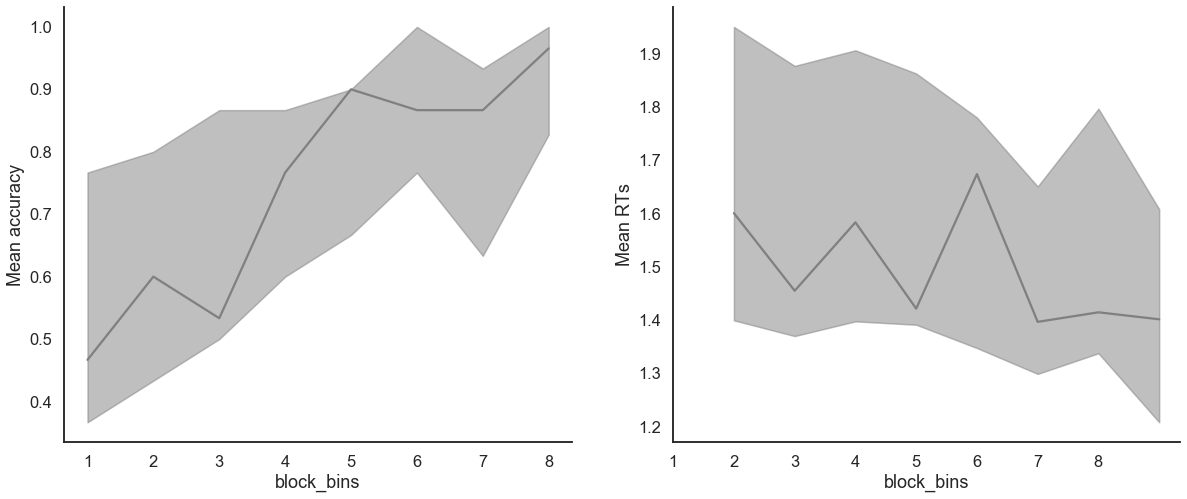

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

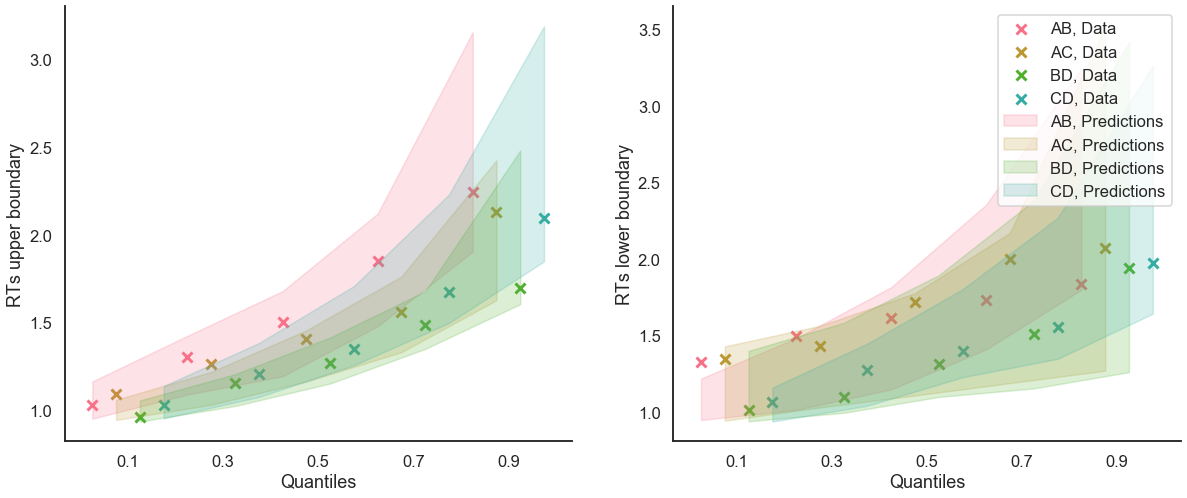

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_DDM.py:228: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=200
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


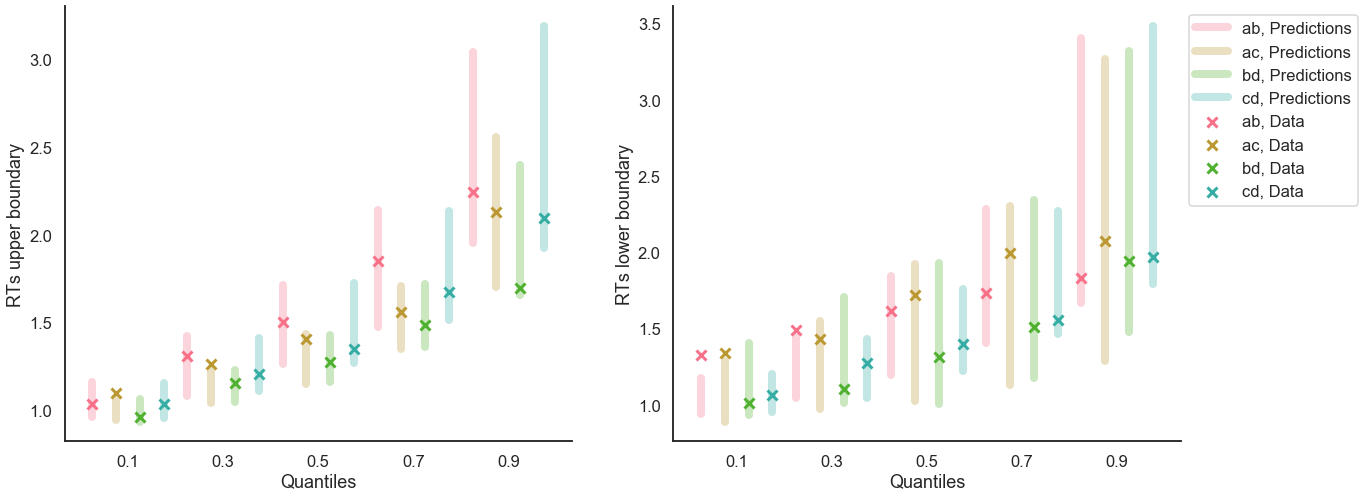

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

### Get starting values for further sampling

In [27]:
sv = model_fit.last_values
sv

,chain,draw,warmup,alpha,drift_scaling,ndt,threshold,threshold_modulation
99,0,99,0,-1.097764,-2.414710,0.201796,2.463731,-0.017077
199,1,99,0,-3.267924,6.322537,0.203787,3.941800,-0.080251
